In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime 

seed = 42
np.random.seed(seed)
plt.style.use("ggplot")

sys.path.insert(0,"../DeepMIMO/")

from train import ifft_transform

In [2]:
# reading the data
input_data = np.load("../DeepMIMO/DeepMIMO Dataset/dataset_I_2p4_64_ofdm_seperate_bs.npy")
output_data = np.load("../DeepMIMO/DeepMIMO Dataset/dataset_I_2p5_64_ofdm_seperate_bs.npy")
print(input_data.shape,output_data.shape)

(605608, 128) (605608, 128)


In [3]:
t1 = datetime.datetime.now()
before_ifft_corr_values = []
for i in range(input_data.shape[1]):
    before_ifft_corr_values.append(np.corrcoef(input_data[:,i],output_data[:,i])[0][1])

input_data_after_transform = ifft_transform(input_data)
output_data_after_transform = ifft_transform(output_data)
after_ifft_corr_values = []
for i in range(input_data.shape[1]):
    after_ifft_corr_values.append(np.corrcoef(input_data_after_transform[:,i],output_data_after_transform[:,i])[0][1])

t2 = datetime.datetime.now()
print((t2-t1).total_seconds(),"seconds")

11.298455 seconds


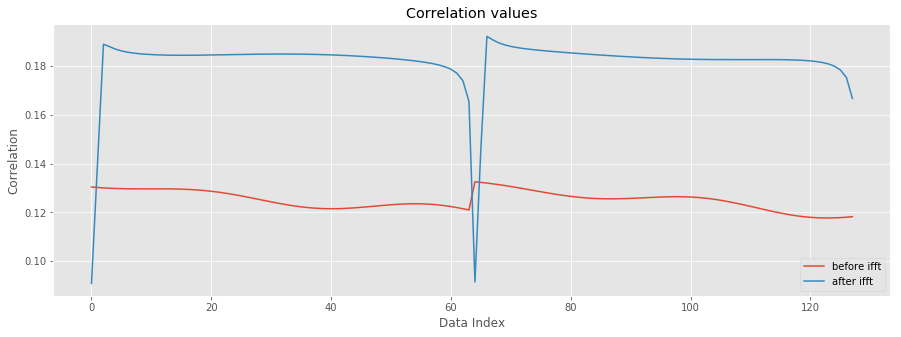

In [4]:
plt.figure(figsize=(15,5))
plt.plot(before_ifft_corr_values,label='before ifft')
plt.plot(after_ifft_corr_values,label='after ifft')
plt.title("Correlation values")
plt.ylabel("Correlation")
plt.xlabel("Data Index")
plt.legend()
plt.show()